In [2]:
import pandas as pd 

data = pd.read_excel('honour killing data.xlsx')

# print(data.head())

print(data.columns.tolist())

data.columns = data.columns.str.strip()

['ID', 'Date Published', 'News Source', 'Title ', 'Article Link ', 'Victim(s) Gender', 'Victim(s) Age ', 'Relationship to Perptrator', 'Cause, Motive ', 'Region ', 'Narrative Summary ', 'Framing ', 'Method of killing ', 'Additional notes ']


In [5]:
from collections import Counter
import matplotlib.pyplot as plt




Relationship of the perptrator to the victim 


In [3]:
relationship_mapping = {
    'brother': 'brother',
    'father': 'father',
    'husband': 'husband',
    'son': 'son',
    'uncle': 'uncle',
    'in-laws': 'in-laws',
    'relatives': 'relatives',
    'two brothers': 'brothers',
    'brother-in-law': 'in-laws',
    'father-in-law': 'in-laws',
    'woman’s brother': 'brother',
    'woman’s brother and father': 'relatives',
    'father and brother of the girl': 'relatives',
    'a man from the same caste': 'community member',
    'possibility of family members or acquaintances': 'relatives',
    'unknown armed men': 'unknown',
    'former fiancé along with brother-in-law': 'in-laws',
    'chandio and lobo tribes': 'community member',
    'four unknown armed men': 'unknown',
    '6 men suspected': 'unknown',
    'four people arrested': 'unknown',
    'a man and a dog': 'other'
    
}


In [4]:
def clean_relationship(value):
    value = value.lower()
    for key in relationship_mapping:
        if key in value:
            return relationship_mapping[key]
    return 'other'

data['cleaned_relationship'] = data['Relationship to Perptrator'].astype(str).apply(clean_relationship)


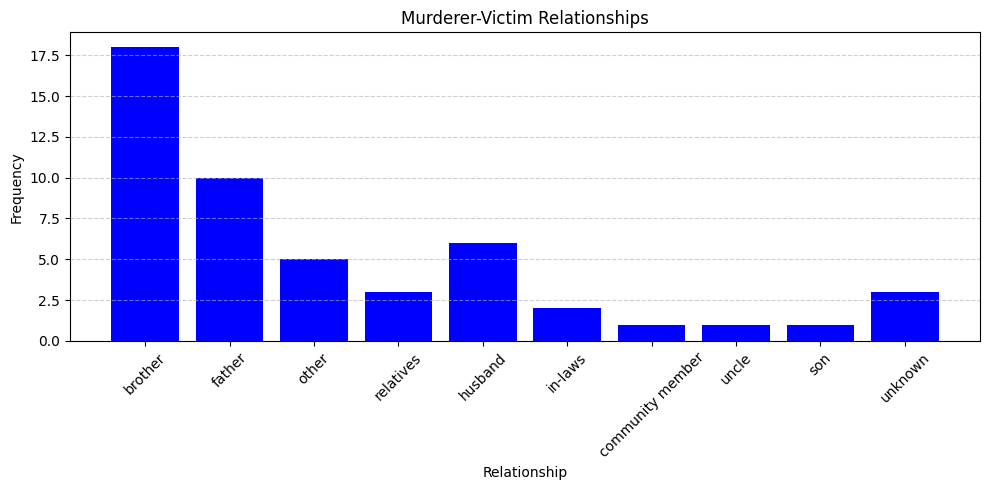

In [13]:
relationship_counts = Counter(data['cleaned_relationship'].dropna())

plt.figure(figsize=(10, 5))
plt.bar(relationship_counts.keys(), relationship_counts.values(), color='blue')
plt.title("Murderer-Victim Relationships")
plt.xlabel("Relationship")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Age of the victim


In [ ]:
import re

# Extract numbers (ages) from a column
data['Extracted_Age'] = data['Victim(s) Age'].astype(str).apply(lambda x: re.findall(r'\d+', x)[0] if re.findall(r'\d+', x) else None)

data['Extracted_Age'].head()

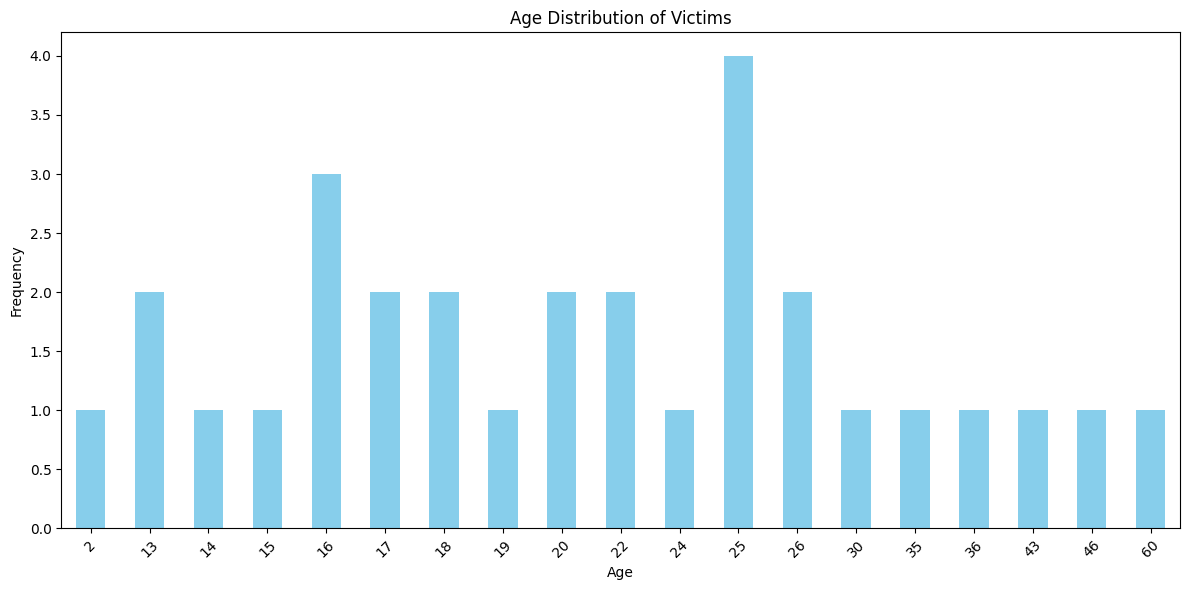

In [9]:
# Convert to numeric (some cells may be None or invalid)
data['Extracted_Age'] = pd.to_numeric(data['Extracted_Age'], errors='coerce')

# Drop NaN and convert to integers
age_counts = data['Extracted_Age'].dropna().astype(int).value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Age Distribution of Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Gender of the victim


In [17]:
# 'girl' with 'woman' in the Gender column (case-insensitive)
data['Gender'] = data['Victim(s) Gender'].astype(str).str.replace(r'\bgirl\b', 'woman', case=False, regex=True)

print(data['Gender'].value_counts())


Gender
woman                         22
woman and man                 11
two women                      2
man                            2
four women                     1
four women                     1
woman and ex husband           1
woman                          1
men                            1
woman and three children       1
woman, four children           1
girls                          1
woman and man                  1
woman, infant daughter         1
a woman and a married man      1
two women and a man            1
two men                        1
Name: count, dtype: int64


In [18]:
# Ensure lowercase
data['Gender'] = data['Gender'].astype(str).str.lower()

# Define mapping rules
replacements = {
    r'girls?': 'woman',
    r'boys?': 'man',
    r'men': 'man',
    r'women': 'woman',
    r'infant|baby|child|toddler|daughter|son': 'child',
    r'ex husband|husband': 'man',
    r'married man': 'man'
}

# Apply regex replacements
for pattern, replacement in replacements.items():
    data['Gender'] = data['Gender'].str.replace(pattern, replacement, regex=True)

# Replace combinations like "woman and man", "woman, child" with a flat list
def extract_individual_genders(text):
    return re.findall(r'woman|man|child', text)

# Create a new column with the list
data['Gender_list'] = data['Gender'].apply(extract_individual_genders)

# Flatten all values to count
from collections import Counter
all_genders = [gender for sublist in data['Gender_list'] for gender in sublist]
gender_counts = Counter(all_genders)

# Print cleaned counts
print(gender_counts)


Counter({'woman': 46, 'man': 19, 'child': 4})


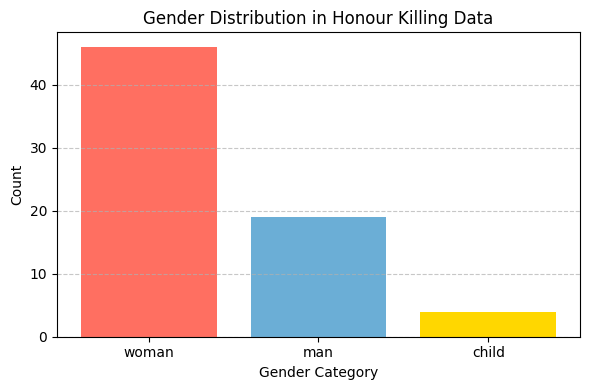

In [19]:
# Plotting
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.keys(), gender_counts.values(), color=['#FF6F61', '#6BAED6', '#FFD700'])

plt.title("Gender Distribution in Honour Killing Data")
plt.xlabel("Gender Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()